# Titanic - Solution - Easiest Way


### I used following techniques in this notebook
1. Loading Data using Pandas
2. Checking varible type for each column
3. Checking number of nulls in each column
4. Finding column in Dataset
5. Drop useless columns
6. Handling Missing value with Median and Mode
7. Checking occurance of each category
8. Data Visualiztion using Matplotlib
9. Checking Ouliers
10. Handling Categorical Data using Get_Dummies()
11. Concatenating the Original Dataset & the One after creating Dummies
12. Seggregating X & y.
13. Preprocessing Numeric Data using StandardScaler
14. Dropping useless columns after we get_dummies()
15. Splitting using train_test_split
16. Using Random Forest as ML model
17. Predicting & Scoring the Trained Model

In [462]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **1. Loading Data using Pandas**

In [464]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
test_df=test.copy()

# train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2. Checking varible type for each column

In [465]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3. Checking number of nulls in each column

In [466]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 4. Finding column in Dataset

In [467]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [468]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 5. Drop useless columns

In [469]:
train.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['Name', 'Ticket', 'Cabin'], axis=1, inplace= True)
# train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


### 6. Handling Missing value with Median and Mode


In [470]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [471]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### 7. Checking occurance of each category

In [472]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [473]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [474]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [475]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [476]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [477]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 8. Data Visualiztion using Matplotlib

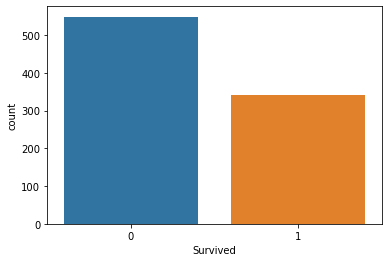

In [478]:
sns.countplot(x='Survived', data= train)

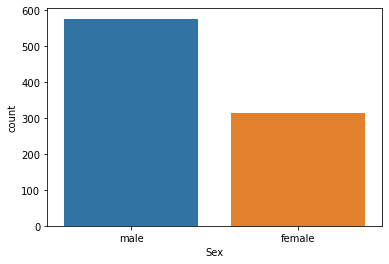

In [479]:
sns.countplot(x='Sex', data= train)

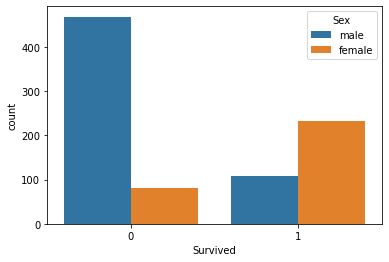

In [480]:
sns.countplot(x='Survived', hue='Sex', data= train)

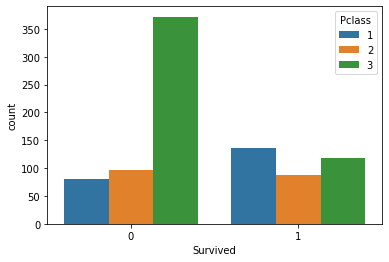

In [481]:
sns.countplot(x='Survived', hue='Pclass', data= train)

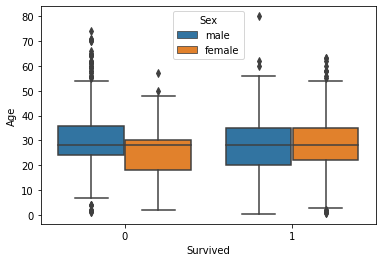

In [482]:
sns.boxplot(x='Survived', y= 'Age', hue='Sex', data= train)

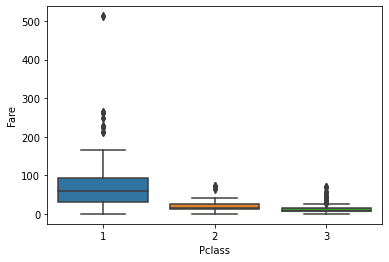

In [483]:
sns.boxplot(x='Pclass', y= 'Fare', data= train)

### 9. Checking Ouliers

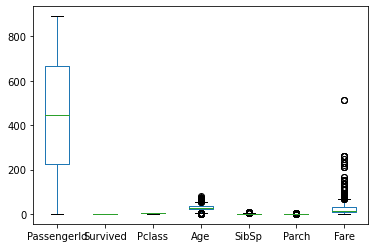

In [484]:
train.plot(kind='box')

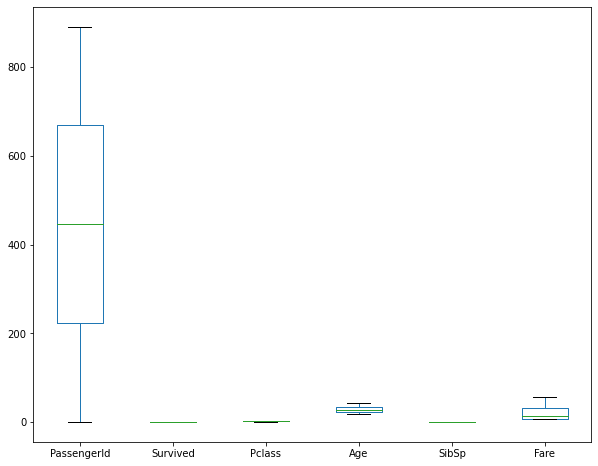

In [485]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)

train.drop(columns=['Parch'], axis=1, inplace=True)
train.plot(kind='box', figsize= (10,8)) 
# no outliers 

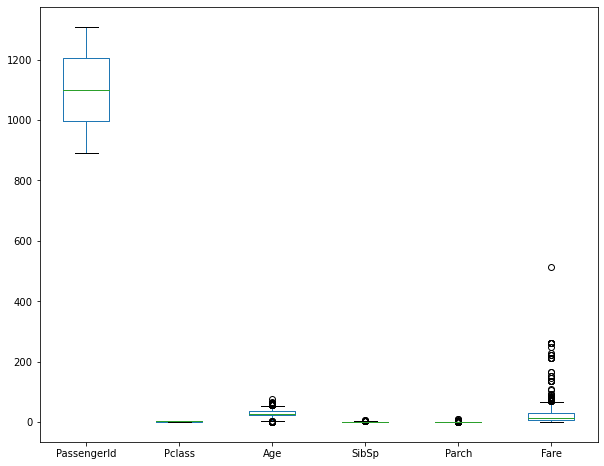

In [486]:
test.plot(kind='box', figsize= (10,8))
# there are outliers

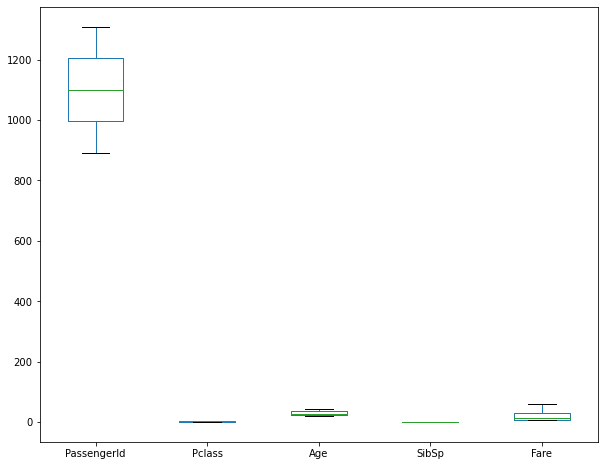

In [487]:
test[cols]= test[cols].clip(lower= test[cols].quantile(0.15), upper= test[cols].quantile(0.85), axis=1)

test.drop(columns=['Parch'], axis=1, inplace=True)
test.plot(kind='box', figsize= (10,8))  
# no outliers

### 10. Handling Categorical Data using Get_Dummies()
#### We use *'drop_first'* to avoid **Dummy Trap**

In [488]:
train1= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)
test1= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

### 11. Concatenating the Original Dataset & the One after creating Dummies*(get_dummies() creates a new DF containing JUST the dummies, MOST People get wrong here)*

In [489]:
train2=pd.concat([train,train1],axis=1)
test2=pd.concat([test,test1],axis=1)

### 12. Splitting X & y

In [490]:
y_train= train2['Survived']
X_train= train2.drop(['PassengerId','Survived'],axis=1)

# y_test= test2['Survived']
# X_test= test2.drop(['PassengerId','Survived'],axis=1)

### 13. Preprocessing Numeric Data using StandardScaler

In [491]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
features= ['Age', 'SibSp', 'Fare']

X_train[features]= ss.fit_transform(X_train[features])

X_test[features]= ss.fit_transform(X_test[features])
# X_train.head()
X_test.head()

,Age,SibSp,Fare,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
47,-0.105877,-0.690522,-0.871666,-0.105877,-0.690522,-0.871666,0,1,0,1,0
151,-0.871625,1.448179,1.923063,-0.871625,1.448179,1.923063,0,0,0,0,1
279,0.787495,1.448179,-0.155007,0.787495,1.448179,-0.155007,0,1,0,0,1
499,-0.616375,-0.690522,-0.869040,-0.616375,-0.690522,-0.869040,0,1,1,0,1
549,-1.382123,1.448179,0.790983,-1.382123,1.448179,0.790983,1,0,1,0,1


### 14. Dropping useless columns after we get_dummies()

In [492]:
X_train=X_train.drop(['Pclass','Sex','Embarked'],axis=1)
# X_test=X_test.drop(['Pclass','Sex','Embarked'],axis=1)

### 15. Splitting using train_test_split

In [493]:

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 16. Using Random Forest as ML model

In [494]:
#Using little bit of Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

### 17. Predicting & Scoring the Trained Model

In [495]:
predictions= clf.predict(X_test)
clf.score(X_test, y_test)

0.9282511210762332

### 18. Saving the output in a file

In [496]:
submission= pd.DataFrame(data=predictions)
print(submission.head())
filename= 'titanic_prediction1.csv'
submission.to_csv(filename,index=False)

   0  1
0  1  1
1  1  1
2  1  1
3  0  0
4  1  1


#### If you like this notebook, give an upvote. Any suggestions or comments are appreciated.